# WeatherPy
----


This uses an open weather API to get weather data for a randomly chosen set of cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


604

In [4]:
cities

['albany',
 'cape town',
 'hobart',
 'rawannawi',
 'atuona',
 'taolanaro',
 'guerrero negro',
 'nanortalik',
 'vitim',
 'punta arenas',
 'sao jose da coroa grande',
 'vila franca do campo',
 'ostrovnoy',
 'takaka',
 'san cristobal',
 'puerto ayora',
 'kapaa',
 'raga',
 'bethel',
 'kruisfontein',
 'illoqqortoormiut',
 'hermanus',
 'arraial do cabo',
 'tuktoyaktuk',
 'tiksi',
 'rikitea',
 'mar del plata',
 'bluff',
 'buraydah',
 'henties bay',
 'mataura',
 'deputatskiy',
 'sehithwa',
 'praia da vitoria',
 'caraquet',
 'hovd',
 'mitzic',
 'port alfred',
 'san quintin',
 'saint-philippe',
 'nikolskoye',
 'san patricio',
 'bauchi',
 'busselton',
 'vaini',
 'vestmannaeyjar',
 'karratha',
 'ushuaia',
 'dingle',
 'sangar',
 'sharkan',
 'rudsar',
 'finote selam',
 'sataua',
 'simpang',
 'santa cruz',
 'carnarvon',
 'barrow',
 'isangel',
 'palabuhanratu',
 'victoria',
 'wanaka',
 'berdigestyakh',
 'iquique',
 'rorvik',
 'peniche',
 'bredasdorp',
 'coolum beach',
 'newport',
 'qaqortoq',
 'port e

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# set units in temperature
unit = 'imperial'

# set open weather url
url = 'http://api.openweathermap.org/data/2.5/weather?appid=' + weather_api_key + '&units=' + unit + '&q=' 

In [8]:
# set empty variables
i=0
temp=[]
humid=[]
cloud=[]
wind=[]
country=[]
clean_city=[]
clean_lats=[]
clean_longs=[]

In [9]:
# get open weather data for all cities


for city in cities:
    try:
        time.sleep(2)
        
        # get weather data 
        query_url = url + city 
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        # create temp, humidity, cloudiness, wind speed, country lists
        temp.append(weather_json['main']['temp'])
        humid.append(weather_json['main']['humidity'])
        cloud.append(weather_json['clouds']['all'])
        wind.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        clean_lats.append(weather_json['coord']['lat'])
        clean_longs.append(weather_json['coord']['lon'])
        
        # record counter
        i += 1
        
        print(f'Processing Record {i}: {city}')
            
        clean_city.append(city)      
              
    except:
        print('City not found. Skipping...')
    
    

Processing Record 1: albany
Processing Record 2: cape town
Processing Record 3: hobart
City not found. Skipping...
Processing Record 4: atuona
City not found. Skipping...
Processing Record 5: guerrero negro
Processing Record 6: nanortalik
Processing Record 7: vitim
Processing Record 8: punta arenas
Processing Record 9: sao jose da coroa grande
Processing Record 10: vila franca do campo
Processing Record 11: ostrovnoy
Processing Record 12: takaka
Processing Record 13: san cristobal
Processing Record 14: puerto ayora
Processing Record 15: kapaa
Processing Record 16: raga
Processing Record 17: bethel
Processing Record 18: kruisfontein
City not found. Skipping...
Processing Record 19: hermanus
Processing Record 20: arraial do cabo
Processing Record 21: tuktoyaktuk
Processing Record 22: tiksi
Processing Record 23: rikitea
Processing Record 24: mar del plata
Processing Record 25: bluff
Processing Record 26: buraydah
Processing Record 27: henties bay
Processing Record 28: mataura
Processing R

Processing Record 241: sept-iles
Processing Record 242: okoneshnikovo
Processing Record 243: takoradi
Processing Record 244: shimoda
Processing Record 245: ahuimanu
City not found. Skipping...
Processing Record 246: stornoway
Processing Record 247: coihaique
City not found. Skipping...
City not found. Skipping...
Processing Record 248: mandalgovi
Processing Record 249: omsukchan
Processing Record 250: port-gentil
Processing Record 251: madang
Processing Record 252: tolaga bay
Processing Record 253: sistranda
Processing Record 254: pevek
Processing Record 255: celestun
City not found. Skipping...
Processing Record 256: edson
Processing Record 257: kantunilkin
Processing Record 258: sunrise manor
Processing Record 259: hami
Processing Record 260: roald
Processing Record 261: mazatlan
Processing Record 262: qatana
Processing Record 263: zhezkazgan
Processing Record 264: padang
Processing Record 265: port antonio
Processing Record 266: mahbubabad
City not found. Skipping...
Processing Reco

Processing Record 474: keuruu
Processing Record 475: leshukonskoye
Processing Record 476: tessalit
Processing Record 477: marsa matruh
Processing Record 478: nchelenge
Processing Record 479: whitewater
Processing Record 480: high level
Processing Record 481: krasnogorsk
Processing Record 482: camacha
Processing Record 483: jijiga
Processing Record 484: christchurch
Processing Record 485: toila
Processing Record 486: srandakan
Processing Record 487: oda
Processing Record 488: eyl
Processing Record 489: altay
Processing Record 490: bubaque
Processing Record 491: dubti
Processing Record 492: omboue
Processing Record 493: zhangjiakou
Processing Record 494: goundi
Processing Record 495: hutang
Processing Record 496: bayeux
Processing Record 497: santa catarina de tepehuanes
Processing Record 498: sola
Processing Record 499: jaciara
Processing Record 500: tevriz
Processing Record 501: sens
Processing Record 502: muisne
City not found. Skipping...
Processing Record 503: puerto madryn
Processi

In [10]:
# build weather dataframe
weather_dict = {'city': clean_city,
               'Lat': clean_lats,
               'Long': clean_longs,
               'Temp': temp,
               'Humidity': humid,
               'Cloudiness': cloud,
               'Wind Speed': wind,
               'Country': country}

weather_data = pd.DataFrame(weather_dict)

In [11]:
weather_data.head()

,city,Lat,Long,Temp,Humidity,Cloudiness,Wind Speed,Country
0,albany,42.6001,-73.9662,63.36,94,100,1.01,US
1,cape town,-33.9258,18.4232,55.60,57,89,5.99,ZA
2,hobart,-42.8794,147.3294,55.42,68,75,5.99,AU
3,atuona,-9.8000,-139.0333,77.97,78,32,21.18,PF
4,guerrero negro,27.9769,-114.0611,71.82,58,26,3.76,MX


In [12]:
# export data into a csv file
weather_data.to_csv("output_data/weather_data.csv", index=False, header=True)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_data.head()

,city,Lat,Long,Temp,Humidity,Cloudiness,Wind Speed,Country
0,albany,42.6001,-73.9662,63.36,94,100,1.01,US
1,cape town,-33.9258,18.4232,55.60,57,89,5.99,ZA
2,hobart,-42.8794,147.3294,55.42,68,75,5.99,AU
3,atuona,-9.8000,-139.0333,77.97,78,32,21.18,PF
4,guerrero negro,27.9769,-114.0611,71.82,58,26,3.76,MX


In [14]:
weather_data.describe()

,Lat,Long,Temp,Humidity,Cloudiness,Wind Speed
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,20.526268,15.320530,60.331985,68.296903,52.992714,8.035264
std,33.238451,90.945619,19.650994,22.521466,39.282478,6.087414
min,-54.800000,-175.200000,-1.430000,7.000000,0.000000,0.000000
25%,-6.133300,-65.305100,45.460000,57.000000,9.000000,3.510000
50%,25.350000,18.501200,62.850000,73.000000,59.000000,6.640000
75%,47.840500,93.833300,76.950000,87.000000,92.000000,11.160000
max,78.218600,179.316700,103.980000,100.000000,100.000000,38.450000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

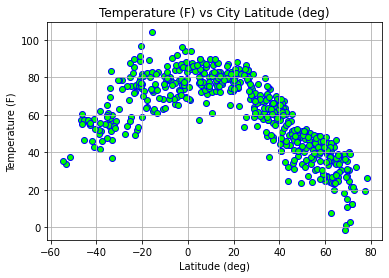

In [38]:
# plot temp vs latitude
x_val = weather_data['Lat']
y_val = weather_data['Temp']
plt.scatter(x_val, y_val, marker='o', color='lime', edgecolor='blue')
plt.title('Temperature (F) vs City Latitude (deg)')
plt.xlabel('Latitude (deg)')
plt.ylabel('Temperature (F)')
plt.grid(True)

#save png
plt.savefig('output_data/TempVsLat.png')

plt.show()

This analyzes the temperatures of the cities against their latitude. The further away the city is located from 0 degrees latitude, or, the equator, the lower the temperatures are nearer to 0. Alternatively, the closer the city is to the equator the higher the temperature is closer to ~90 degrees F.

## Latitude vs. Humidity Plot

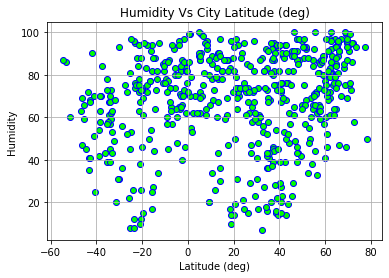

In [39]:
# plot humidity vs latitude 

x_val = weather_data['Lat']
y_val = weather_data['Humidity']

plt.scatter(x_val, y_val, marker='o', color='lime', edgecolor='blue')
plt.title('Humidity Vs City Latitude (deg)')
plt.xlabel('Latitude (deg)')
plt.ylabel('Humidity')
plt.grid(True)

#save png
plt.savefig('output_data/HumidityVsLat.png')

plt.show()

This plot analyzes humidity of each of the cities against their latitude. According to the plot, most cities, despite where they are latititude-wise, have humidity above 60.

## Latitude vs. Cloudiness Plot

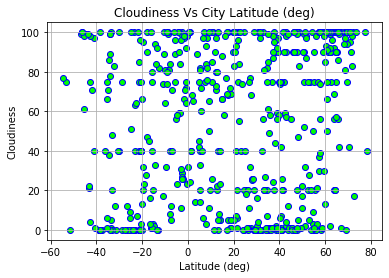

In [40]:
# plot latitude vs. cloudiness

x_val = weather_data['Lat']
y_val = weather_data['Cloudiness']

plt.scatter(x_val, y_val, marker='o', color='lime', edgecolor='blue')
plt.title('Cloudiness Vs City Latitude (deg)')
plt.xlabel('Latitude (deg)')
plt.ylabel('Cloudiness')
plt.grid(True)

#save png
plt.savefig('output_data/CloudinessVsLat.png')

plt.show()

This plot analyzes cloudiness of each of the cities against their latitude. It can be seen in the plot that despite their location latitude-wise, the cloudiness varies from 0-100%. It also seems that many cities either have 0% or 100% cloudiness.

## Latitude vs. Wind Speed Plot

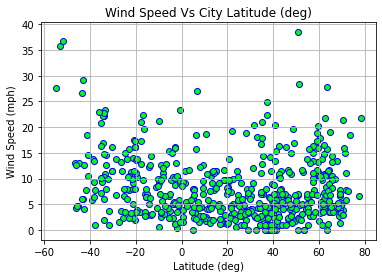

In [41]:
# plot latitude vs. cloudiness

x_val = weather_data['Lat']
y_val = weather_data['Wind Speed']
plt.scatter(x_val, y_val, marker='o', color='lime', edgecolor='blue')
plt.title('Wind Speed Vs City Latitude (deg)')
plt.xlabel('Latitude (deg)')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

#save png
plt.savefig('output_data/WindVsLat.png')

plt.show()

This plot analyzes wind speed of each of the cities against their latitude. It can be seen in the plot that most cities are below 15 mph independent of their latitude.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
# split cities into hemispheres
north_data = weather_data.loc[weather_data['Lat'] >= 0]
south_data = weather_data.loc[weather_data['Lat'] < 0]

The r-squared is: 0.8111907913219363
y = -0.92x + 91.92


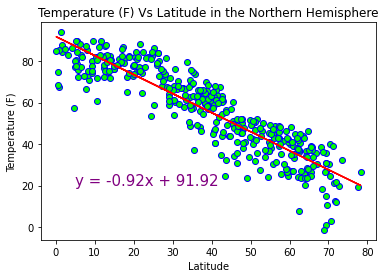

In [46]:
xVals = north_data['Lat']
yVals = north_data['Temp']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xVals,yVals)
regress_values = (slope * xVals) + intercept

eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xVals, yVals, color='lime', edgecolor='blue')
plt.plot(xVals,regress_values,"r-")

plt.annotate(eqn,(5,20),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title (f'Temperature (F) Vs Latitude in the Northern Hemisphere')

print(f"The r-squared is: {rvalue**2}")
print(eqn)

#save png
plt.savefig('output_data/LinRegTempLatNorth.png')

plt.show()

This figure plots the temperature (F) of cities in the northern hemisphere (cities north of the equator). There is a strong negative relationship with temperature and latitude where the correlation coefficient is 0.79. The further the city is from the equator the lower the temperature.  

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49958677644562566
y = 0.7x + 84.63


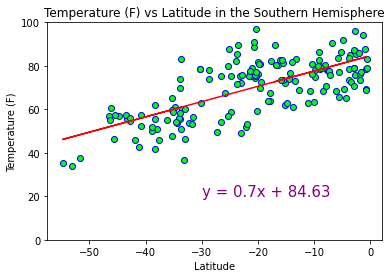

In [47]:
xVals = south_data['Lat']
yVals = south_data['Temp']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xVals,yVals)
regress_values = (slope * xVals) + intercept

eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xVals, yVals, color='lime', edgecolor='blue')
plt.plot(xVals,regress_values,"r-")

plt.annotate(eqn,(-30,20),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title (f'Temperature (F) vs Latitude in the Southern Hemisphere')
plt.ylim([0,100])

print(f"The r-squared is: {rvalue**2}")
print(eqn)

#save png
plt.savefig('output_data/LinRegTempLatSouth.png')

plt.show()

In this plot the temperatures of cities south of the equator are plotted against their latitude. There is a positive relationship in that the temperatures get higher as the latitudes approach 0. The relationship is not as strong as it is for the northern hemispere with a correlation coefficient of 0.54.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.015920131296429475
y = 0.14x + 64.14


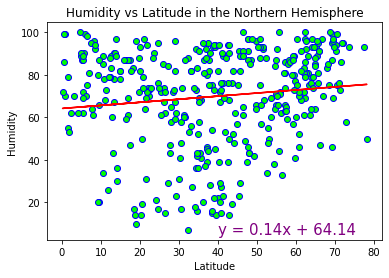

In [66]:
xVals = north_data['Lat']
yVals = north_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xVals,yVals)
regress_values = (slope * xVals) + intercept

eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xVals, yVals, color='lime', edgecolor='blue')
plt.plot(xVals,regress_values,"r-")

plt.annotate(eqn,(40,5),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title (f'Humidity vs Latitude in the Northern Hemisphere')

print(f"The r-squared is: {rvalue**2}")
print(eqn)

#save png
plt.savefig('output_data/LinRegHumidLatNorth.png')

plt.show()

In this plot there is a weak positive relationship between humidity and latitude of a city in the northern hemisphere with the correlation coefficient of 0.02. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07067587105307996
y = 0.41x + 73.49


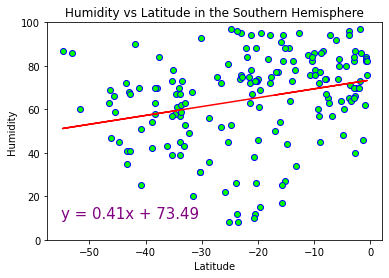

In [53]:
xVals = south_data['Lat']
yVals = south_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xVals,yVals)
regress_values = (slope * xVals) + intercept

eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xVals, yVals, color='lime', edgecolor='blue')
plt.plot(xVals,regress_values,"r-")

plt.annotate(eqn,(-55,10),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylim([0,100])
plt.ylabel('Humidity')
plt.title (f'Humidity vs Latitude in the Southern Hemisphere')

print(f"The r-squared is: {rvalue**2}")
print(eqn)

#save png
plt.savefig('output_data/LinRegHumidLatSouth.png')

plt.show()

In this plot, there is also a weak positive relationship with humidity and latitude in southern hemisphere with a correlation coefficient of 0.07.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0369887800986546
y = 0.38x + 39.25


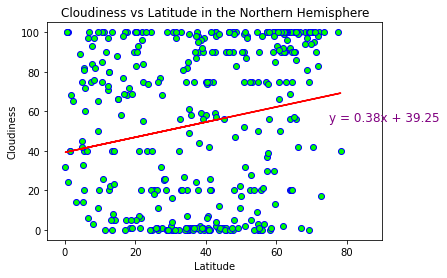

In [65]:
xVals = north_data['Lat']
yVals = north_data['Cloudiness']

(slope, intercept, rvalue
 , pvalue, stderr) = st.linregress(xVals,yVals)
regress_values = (slope * xVals) + intercept

eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xVals, yVals, color='lime', edgecolor='blue')
plt.plot(xVals,regress_values,"r-")

plt.annotate(eqn,(75,55),fontsize=12,color="purple")
plt.xlabel('Latitude')
plt.xlim([-5,90])
plt.ylabel('Cloudiness')
plt.title (f'Cloudiness vs Latitude in the Northern Hemisphere')

print(f"The r-squared is: {rvalue**2}")
print(eqn)

#save png
plt.savefig('output_data/LinRegCloudLatNorth.png')

plt.show()

In this plot there is also a weak positive relationship of cloudiness to latitude of a city in the northern hemisphere with a correlation coefficient of 0.04.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.020190038469076674
y = 0.39x + 58.52


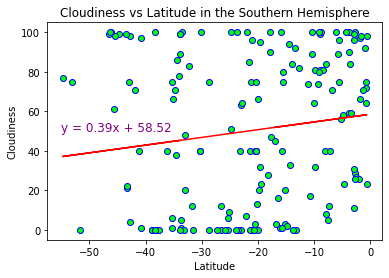

In [63]:
xVals = south_data['Lat']
yVals = south_data['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xVals,yVals)
regress_values = (slope * xVals) + intercept

eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xVals, yVals, color='lime', edgecolor='blue')
plt.plot(xVals,regress_values,"r-")

plt.annotate(eqn,(-55,50),fontsize=12,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title (f'Cloudiness vs Latitude in the Southern Hemisphere')

print(f"The r-squared is: {rvalue**2}")
print(eqn)

#save png
plt.savefig('output_data/LinRegCloudLatSouth.png')

plt.show()

In this plot there is again a weak positive relationship with cloudiness and city latitude in the southern hemisphere with a correlation coefficient of 0.02.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.025719299190548384
y = 0.04x + 5.41


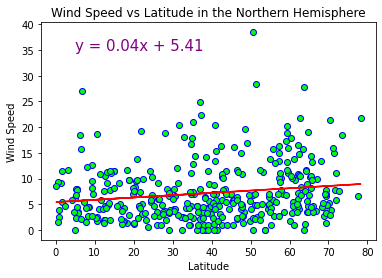

In [62]:
xVals = north_data['Lat']
yVals = north_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xVals,yVals)
regress_values = (slope * xVals) + intercept

eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xVals, yVals, color='lime', edgecolor='blue')
plt.plot(xVals,regress_values,"r-")

plt.annotate(eqn,(5,35),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title (f'Wind Speed vs Latitude in the Northern Hemisphere')

print(f"The r-squared is: {rvalue**2}")
print(eqn)

#save png
plt.savefig('output_data/LinRegWindLatNorth.png')

plt.show()

Most cities in the northern hemisphere have wind speed at 10 mph or under. There seems to be no relationship with wind speed and latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11980237363213941
y = -0.17x + 6.48


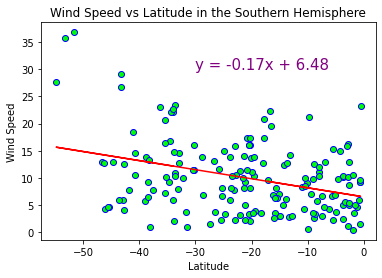

In [64]:
xVals = south_data['Lat']
yVals = south_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xVals,yVals)
regress_values = (slope * xVals) + intercept

eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xVals, yVals, color='lime', edgecolor='blue')
plt.plot(xVals,regress_values,"r-")

plt.annotate(eqn,(-30,30),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title (f'Wind Speed vs Latitude in the Southern Hemisphere')

print(f"The r-squared is: {rvalue**2}")
print(eqn)

#save png
plt.savefig('output_data/LinRegWindLatSouth.png')

plt.show()

In this plot there seems to be a weak negative relationship with wind speed and latitude of a city in the southern hemisphere where wind speed slows down the closer it is to the equator with a correlation coefficient of 0.12.

## Observations

1. There is a strong relationship with temperature and a city's latitude location. The closer a city is located to the equator (0 deg latitude), the higher its temperature. This applies to both the northern and southern hemispheres. This is attributed to the fact that cities near the equator are closer to the sun and therefore experience warmer climates. Cities furthest from the equator are furthest from the sun and experience colder climates (i.e. Juno, Alaska).


2. There seems to be no relationship with cloudiness and a city's latitidue location in either hemisphere. This makes sense given the motion of clouds are fluid and cloudiness over a city can vary and can depend on the wind and other weather factors. 


3. Surprisingly there was no strong observable patterns of humidity in the plots above. It would be expected that humidity is greater in cities closer to the equator given that tropic areas are closer to the equator. This was observed in the southern hemisphere but with a weak relationship with a correlation coefficient of 0.07. This could be attributed to the fact that the weather data were recorded in October and a stronger relationship could perhaps be observed at a different time of the year.